In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import sklearn 
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import r2_score
import warnings
warnings.filterwarnings("ignore")

In [2]:
df = pd.read_excel('shoe.xlsx')

In [3]:
df.head()

,size(cm),class(y)
0,9.500,Female
1,10.125,Male
2,10.410,Male
3,9.810,Female
4,11.050,Male


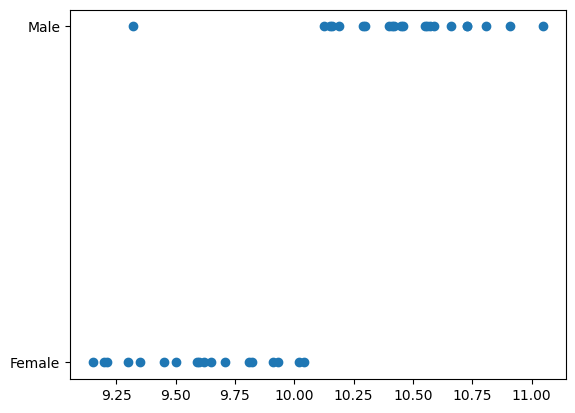

In [4]:
plt.scatter(df['size(cm)'],df['class(y)'])

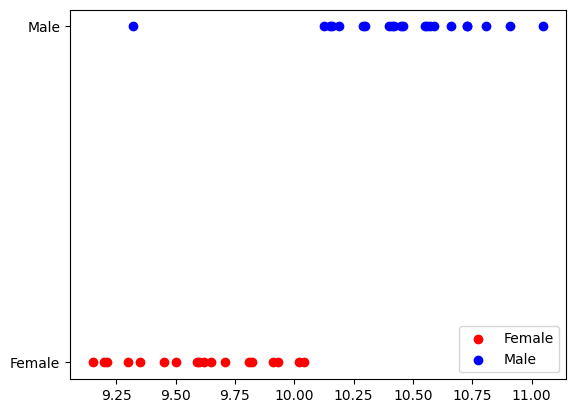

In [5]:
df0 = df[df['class(y)']=='Female']
df1 = df[df['class(y)']=='Male']

plt.scatter(df0['size(cm)'],df0['class(y)'],color='red',label='Female')

plt.scatter(df1['size(cm)'],df1['class(y)'],color='blue',label='Male')

plt.legend()

# Processsing

In [6]:
df['class(y)'] = df['class(y)'].replace(['Male','Female'],[1,0])

In [7]:
df.head()

,size(cm),class(y)
0,9.500,0
1,10.125,1
2,10.410,1
3,9.810,0
4,11.050,1


In [8]:
from sklearn.model_selection import train_test_split as tts

In [9]:
xtrain,xtest,ytrain,ytest = tts(df[['size(cm)']],df['class(y)'],test_size=0.3,random_state=55)

In [10]:
xtrain.head()

,size(cm)
31,9.91
25,10.46
36,9.21
14,10.55
16,10.02


In [11]:
ytrain.head()

31    0
25    1
36    0
14    1
16    0
Name: class(y), dtype: int64

# LogisticRegression

In [13]:
from sklearn.linear_model import LogisticRegression

In [14]:
reg = LogisticRegression()

In [15]:
reg.fit(xtrain,ytrain)

LogisticRegression()

In [16]:
m = reg.coef_
m

array([[2.10745564]])

In [17]:
c = reg.intercept_
c

array([-20.81422921])

In [18]:
pred = reg.predict(xtest)
pred

array([0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1], dtype=int64)

In [19]:
reg.predict_proba(xtest)

array([[0.80622065, 0.19377935],
       [0.53496519, 0.46503481],
       [0.24519901, 0.75480099],
       [0.64167811, 0.35832189],
       [0.71069738, 0.28930262],
       [0.35975089, 0.64024911],
       [0.47182855, 0.52817145],
       [0.82215406, 0.17784594],
       [0.07776163, 0.92223837],
       [0.2299343 , 0.7700657 ],
       [0.61710592, 0.38289408],
       [0.29058102, 0.70941898]])

In [20]:
ytest.head()

22    0
3     0
2     1
38    0
6     0
Name: class(y), dtype: int64

In [21]:
Log_score = reg.score(xtest,ytest)
Log_score

0.9166666666666666

In [22]:
mae = mean_absolute_error(ytest,pred)
mae

0.08333333333333333

In [23]:
mse = mean_squared_error(ytest,pred)
mse

0.08333333333333333

# Decision Tree

In [26]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
dt = DecisionTreeClassifier()

In [28]:
dt.fit(xtrain, ytrain)

DecisionTreeClassifier()

In [37]:
dt_pred = dt.predict(xtest)
dt_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [30]:
dt_score = dt.score(xtest,ytest)
dt_score

1.0

In [31]:
dt_mae = mean_absolute_error(ytest, dt_pred)
dt_mae

0.0

In [32]:
dt_mse = mean_squared_error(ytest, dt_pred)
dt_mse

0.0

# KNN

In [33]:
from sklearn.neighbors import KNeighborsClassifier

In [35]:
knn = KNeighborsClassifier(n_neighbors=2)

In [36]:
knn.fit(xtrain, ytrain)

KNeighborsClassifier(n_neighbors=2)

In [38]:
knn_pred = knn.predict(xtest)
knn_pred

array([0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 1], dtype=int64)

In [39]:
knn_score = knn.score(xtest,ytest)
knn_score

1.0

In [40]:
knn_mae = mean_absolute_error(ytest, knn_pred)
knn_mae

0.0

In [41]:
knn_mse = mean_squared_error(ytest, knn_pred)
knn_mse

0.0

# Data Frame

In [45]:
data = pd.DataFrame({
    'Name':['Accuracy Score', 'Mean Absolute Error', 'Mean Squared Error'],
    'Logistic': [Log_score, mae, mse],
    'DT': [dt_score, dt_mae, dt_mse],
    'KNN':[knn_score, knn_mae, knn_mse]})
data.head()

,Name,Logistic,DT,KNN
0,Accuracy Score,0.916667,1.0,1.0
1,Mean Absolute Error,0.083333,0.0,0.0
2,Mean Squared Error,0.083333,0.0,0.0


In [46]:
import seaborn as sns

<Axes: xlabel='Name'>

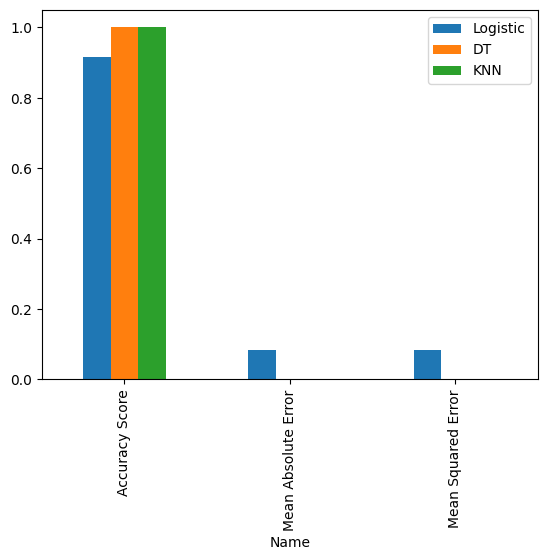

In [63]:
data.plot(x="Name", y=["Logistic", "DT","KNN"], kind="bar")

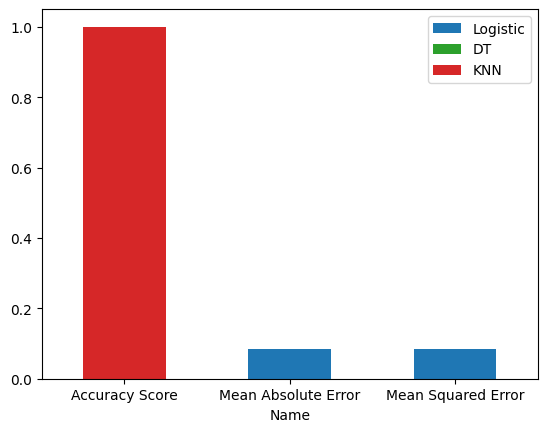

In [58]:
ax = data.plot(x="Name", y="Logistic", kind="bar", rot=0)
data.plot(x="Name", y="DT", kind="bar", ax=ax, color="C2", rot=0)
data.plot(x="Name", y="KNN", kind="bar", ax=ax, color="C3", rot=0)

plt.show()

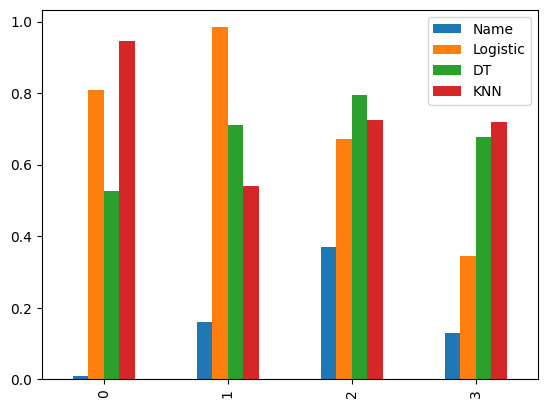

In [67]:
df = pd.DataFrame(data = np.random.random(size=(4,4)), columns = ['Name','Logistic','DT','KNN'])

df.plot(kind='bar')
plt.show()

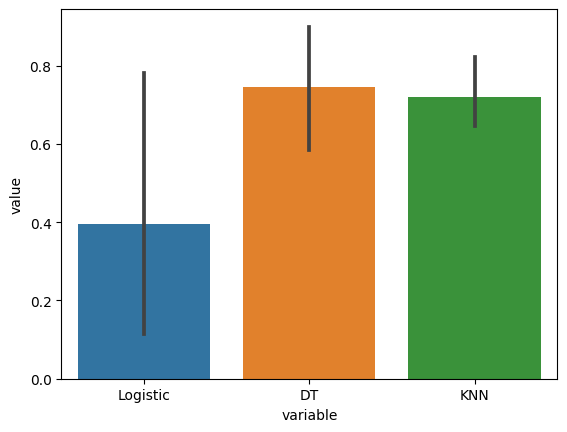

In [70]:
df = pd.DataFrame(data = np.random.random(size=(3,3)), columns = ['Logistic','DT','KNN'])

sns.barplot(x="variable", y="value", data=pd.melt(df))

plt.show()


In [ ]:
plotdata[["Accuracy Score", "Mean Absolute Error", "Mean Squared Error"]].plot(kind="bar", stacked=True)
plt.title("Mince Pie Consumption Totals")
plt.xlabel("Family Member")
plt.ylabel("Pies Consumed")